In [1]:
 %matplotlib inline
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
# Read the City and Ride Data
city = pd.read_csv(r"C:\Users\geofr\Assignment\city_data.csv")
ride = pd.read_csv(r"C:\Users\geofr\Assignment\ride_data.csv")

# Combine the data into a single dataset
pyber_merged = pd.merge(ride, city, how="left", on=["city","city"])
pyber_merged = pyber_merged.sort_values("city")

# Display the data table for preview
pyber_merged.head()

,city,date,fare,ride_id,driver_count,type
919,Amandaburgh,2018-04-24 8:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2018-03-05 2:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2018-03-07 2:26:33,18.76,3419454549176,12,Urban


## Bubble Plot of Ride Sharing Data
    x - Rides per city type
    y - Fare per city type
    z - Driver count per city (correlates with circle size)

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Determine the x and y information
# city type Urban
pyber_urban = pyber_merged.loc[pyber_merged["type"]=="Urban"]
    # group by city
pyber_urban_city = pyber_urban.groupby("city")
    # number of rides per city (x for plotting)
x_urban_rides = pyber_urban_city["type"].count()
    # get the average fare per city (y for plotting)
y_urban_fare = round(pyber_urban_city["fare"].mean(),2)

# city type Suburban
pyber_suburban = pyber_merged.loc[pyber_merged["type"]=="Suburban"]
    # group by city
pyber_suburban_city = pyber_suburban.groupby("city")
    # number of rides per city (x for plotting)
x_suburban_rides = pyber_suburban_city["type"].count()
    # get the average fare per city (y for plotting)
y_suburban_fare = round(pyber_suburban_city["fare"].mean(),2)

# city type Rural
pyber_rural = pyber_merged.loc[pyber_merged["type"]=="Rural"]
    # group by city
pyber_rural_city = pyber_rural.groupby("city")
    # number of rides per city (x for plotting)
x_rural_rides = pyber_rural_city["type"].count()
    # get the average fare per city (y for plotting)
y_rural_fare = round(pyber_rural_city["fare"].mean(),2)


# driver count per city for every city type (marker size)
drivers_urban = city["driver_count"].tolist()
drivers_urban = [each*8 for each in drivers_urban]

drivers_suburban = city["driver_count"].tolist()
drivers_suburban = [each*8 for each in drivers_suburban]

drivers_rural = city["driver_count"].tolist()
drivers_rural = [each*8 for each in drivers_rural]

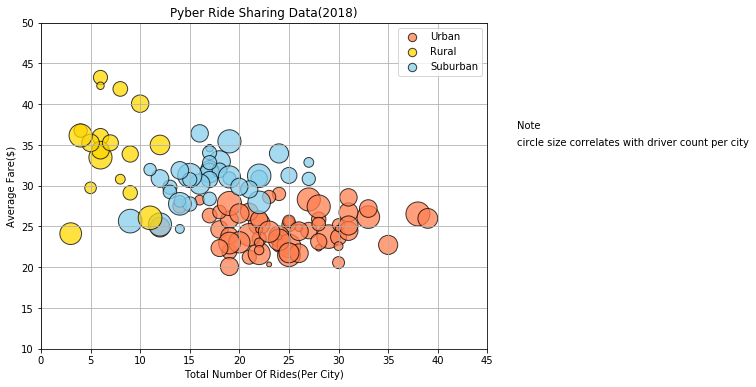

In [3]:
# Build the scatter plots for each city types
 
fig = plt.figure(figsize=(8,6))
plt.grid(True)

# Urban
sct_urban = plt.scatter(x=x_urban_rides,y=y_urban_fare,marker="o",
                        color="coral",s=drivers_urban,edgecolors='black',alpha=0.75,label="Urban")

# Suburban
sct_suburban = plt.scatter(x=x_suburban_rides,y=y_suburban_fare,marker="o",
                        color="skyblue",s=drivers_suburban,edgecolors='black',alpha=0.75,label="Suburban")

# Rural
sct_rural = plt.scatter(x=x_rural_rides,y=y_rural_fare,marker="o",
                        color="gold",s=drivers_rural,edgecolors='black',alpha=0.75,label="Rural")

# Legend properties
graph_legend = plt.legend(handles=[sct_urban,sct_rural,sct_suburban],loc="best")
graph_legend.legendHandles[0]._sizes = [70]
graph_legend.legendHandles[1]._sizes = [70]
graph_legend.legendHandles[2]._sizes = [70]


# Text label, marker size and saving the figure

plt.text(48,37,'Note',fontsize=10)
plt.text(48,35,'circle size correlates with driver count per city',fontsize=10)

# setting x and y limits
plt.xlim(0,45)
plt.ylim(10,50)

# axis labels and title
plt.title("Pyber Ride Sharing Data(2018)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average Fare($)")

plt.show()

In [4]:
# Save the scatter plot graph
plt.show()
plt.savefig(r"C:\Users\geofr\Assignment\pyber_plot.png")


<Figure size 432x288 with 0 Axes>

## Pie Charts
    1.	% of Total Fares by City Type
    2.	% of Total Rides by City Type
    3.	% of Total Drivers by City Type

Total Fares by City Type

In [5]:
# Calculate the Percentages of fare per city type

# total fare for all the city types
tot_fare = round(ride["fare"].sum(),2)

# total fare for each city type
group_by_type = pyber_merged.groupby("type")
total_fare_type = group_by_type["fare"].sum()

# get the percentage for each city type
percent_fare_type = [(x/tot_fare)*100 for x in total_fare_type]
percent_fare_type

[6.811492974983412, 30.46387206273222, 62.72463496228453]

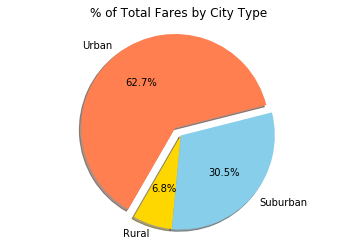

In [6]:
# Build a Pie Chart

# Section labels
fare_labels = ["Rural", "Suburban", "Urban"]

# Section colors
fare_colors = ["gold", "skyblue", "coral"]

# pie chart for fares
plt.pie(percent_fare_type, explode=[0,0,0.1], labels=fare_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

In [7]:
# Save the figure
plt.show()
plt.savefig(r"C:\Users\geofr\Assignment\pyber_pie_fare.png")

<Figure size 432x288 with 0 Axes>

Total Rides by City Type

In [8]:
# Calculate the Percentages of rides per city type

# Total rides for all the city types
tot_ride = ride["ride_id"].count()

# total rides for each city type
group_by_type = pyber_merged.groupby("type")
total_ride_type = group_by_type["ride_id"].count()

# get the percentage for each city type
percent_rides_type = [(x/tot_ride)*100 for x in total_ride_type]
percent_rides_type


[5.263157894736842, 26.31578947368421, 68.42105263157895]

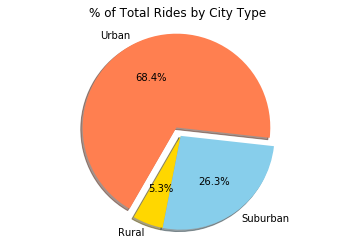

In [9]:
# Build a Pie Chart

# Section labels
ride_labels = ["Rural", "Suburban", "Urban"]

# Section colors
ride_colors = ["gold", "skyblue", "coral"]

# pie chart for fares
plt.pie(percent_rides_type, explode=[0,0,0.1], labels=ride_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

In [10]:
# Save the figure
plt.show()
plt.savefig(r"C:\Users\geofr\Assignment\pyber_pie_ride.png")

<Figure size 432x288 with 0 Axes>

Total Drivers by City Type

In [11]:
# Calculate the Percentages of drivers per city type

# Total drivers for all the city types
tot_driver = city["driver_count"].sum()

# total drivers for each city type
group_by_type = city.groupby("type")
total_driver_type = group_by_type["driver_count"].sum()

# get the percentage for each city type
percent_driver_type = [(x/tot_driver)*100 for x in total_driver_type]
percent_driver_type

[2.6236125126135215, 16.481668348469558, 80.89471913891691]

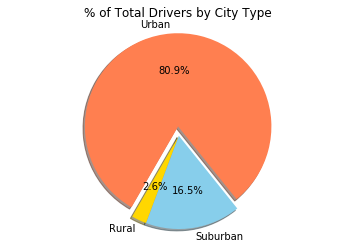

In [12]:
# Build a Pie Chart

# Section labels
driver_labels = ["Rural", "Suburban", "Urban"]

# Section colors
driver_colors = ["gold", "skyblue", "coral"]

# pie chart for fares
plt.pie(percent_driver_type, explode=[0,0,0.1], labels=driver_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

In [13]:
# Save the figure
plt.show()
plt.savefig(r"C:\Users\geofr\Assignment\pyber_pie_driver.png")

<Figure size 432x288 with 0 Axes>

## Observation
    Based on the charts that was provided above, the following can be noted
        1. The Urban type of city, gets the most percentages in the number of riders, drivers and amount of fares
        2. More users of Pyber can be seen on Urban place
        3. Average fares increases if there are low number of Pyber users in the area
        